<a href="https://colab.research.google.com/github/TruongQuocTruong/CS114.L22.KHCL/blob/main/COLAB03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import các thư viện cần thiết, và dữ liệu vào notebook, qua Github.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline

In [4]:
score_train = pd.read_csv('https://raw.githubusercontent.com/TruongQuocTruong/CS114.L22.KHCL/main/COLAB03/score_training.csv')
wecode = pd.read_csv('https://raw.githubusercontent.com/TruongQuocTruong/CS114.L22.KHCL/main/COLAB03/wecode.csv')

**Tổng quát dữ liệu, thông tin chi tiết về các tập dataset**

In [5]:
score_train.head(5)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


In [6]:
score_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [7]:
wecode.head(5)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [8]:
wecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


**Tổng quát một số feature quan trọng, cần thiết trong dataset. Trưc quan hoá các feature**

In [9]:
# Từ những thông tin tổng quát về dataset, ta thấy một số feature dạng số thực nhưng đang trong
# dtype<str>. Sau khi chọn ra một số feature cần sử dụng, ta định dạng lại dtype qua float
# is_final = 1 // pre_score = 10000
SUBMIT = wecode[wecode['is_final'] ==1 ]
SUBMIT = SUBMIT[SUBMIT['pre_score'] == 10000]
SUBMIT = SUBMIT.drop(labels='updated_at',axis =1)
SUBMIT = SUBMIT.drop(labels='created_at',axis =1)
SUBMIT = SUBMIT.drop(labels='file_name',axis =1)
SUBMIT = SUBMIT.drop(labels='language_id',axis =1)
# Điểm cuối kỳ của từng ID_user
SCORE = score_train.drop(labels='QT',axis=1)
SCORE = SCORE.drop(labels='GK',axis=1)
SCORE = SCORE.drop(labels='TH',axis=1)
SCORE = SCORE.drop(labels='TBTL',axis=1)
SCORE = SCORE.drop(labels='TBM',axis=1)
SCORE = SCORE.drop(labels='CK',axis=1)
CK = pd.to_numeric(score_train['CK'],errors='coerce')
SCORE['CK'] = CK

In [10]:
SUBMIT

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient
0,4,0,3,4,1,SCORE,10000,100
1,5,0,4,4,1,SCORE,10000,100
6,10,0,6,4,1,SCORE,10000,100
7,11,0,7,4,1,SCORE,10000,100
8,12,0,8,4,1,SCORE,10000,100
...,...,...,...,...,...,...,...,...
264590,266656,384,626,1047,1,SCORE,10000,84
264592,266658,384,627,1034,1,SCORE,10000,83
264595,266661,0,292,310,1,SCORE,10000,100
264596,266662,0,386,596,1,SCORE,10000,100


In [11]:
ID_FINAL = SUBMIT
ID_FINAL = ID_FINAL.drop(labels='assignment_id',axis=1)
ID_FINAL = ID_FINAL.drop(labels='problem_id',axis=1)
ID_FINAL = ID_FINAL.drop(labels='id',axis=1)
ID_FINAL = ID_FINAL.drop(labels='status',axis=1)
ID_FINAL = ID_FINAL.drop(labels='coefficient',axis=1)
ID_FINAL = ID_FINAL.drop(labels='pre_score',axis=1)

In [12]:
SCORE

,id,CK
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5
...,...,...
970,1857,4.0
971,1859,1.5
972,1862,7.5
973,1865,7.5


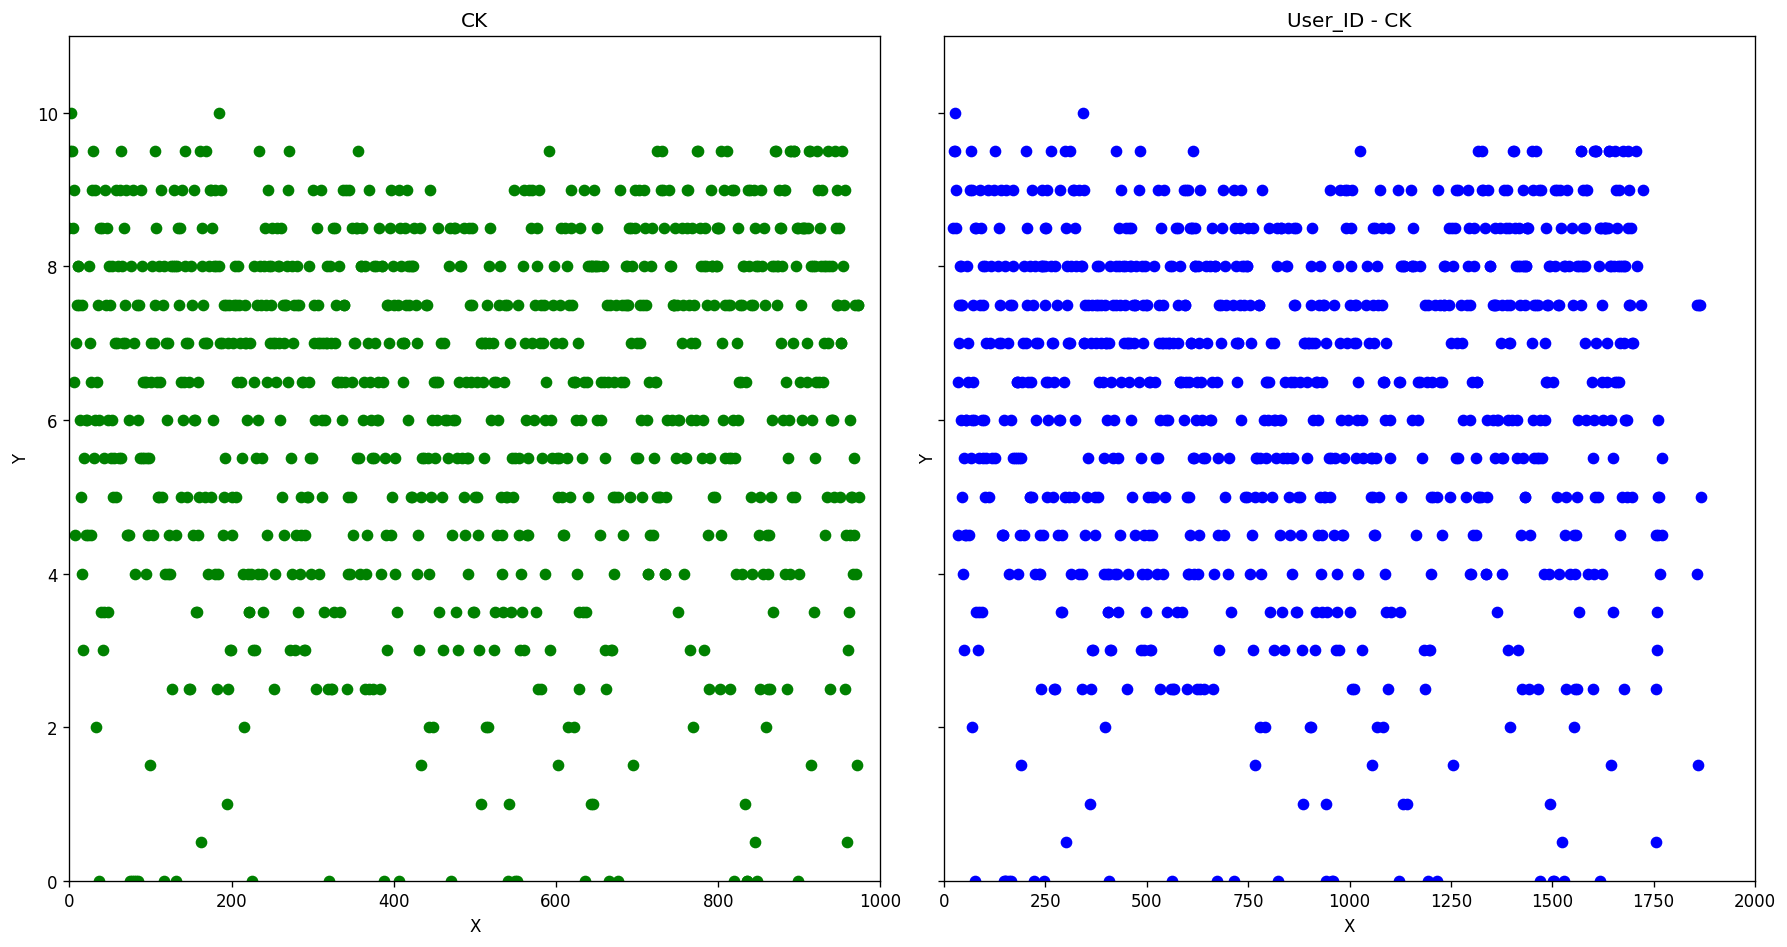

In [13]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(15,8), sharey=True, dpi=120)

ax1.plot(CK, 'go')
ax3.plot(score_train['id'], CK, 'bo')

ax1.set_title('CK'); 
ax3.set_title('User_ID - CK')

ax1.set_xlabel('X'); ax3.set_xlabel('X')
ax1.set_ylabel('Y'); ax3.set_ylabel('Y') 
ax1.set_xlim(0, 1000) ; ax3.set_xlim(0, 2000)
ax1.set_ylim(0, 11); ax3.set_ylim(0, 11)

plt.tight_layout()
plt.show()

Kiểm tra xem những feature trong dataset wecode nào quan trọng và ảnh hưởng đến điểm CK trong score_train

In [14]:
assignment_id = wecode['assignment_id']
problem_id = wecode['problem_id']

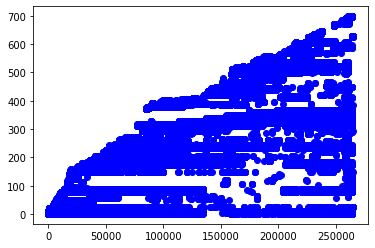

In [15]:
plt.plot(problem_id, 'go', color='b')
plt.xlabel= 'x'
plt.ylabel='y'
plt.show()

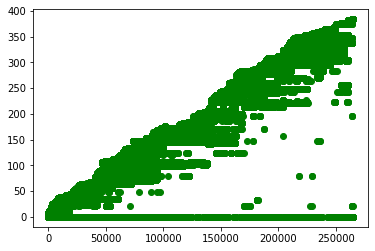

In [16]:
plt.plot(assignment_id, 'go', color='g')
plt.xlabel= 'x'
plt.ylabel='y'
plt.show()

**Trực quan hoá dữ liệu bằng các biểu đồ, thể hiện mối tương quan giữa các feature**

In [17]:
# Để dự đoán được điểm cuối kỳ của từng user_ID, ta sẽ xét xem số lần nộp bài đúng của từng user_ID
# Có rất nhiều yếu tố ảnh hưởng đến điểm CK, nhưng trong trường hợp này, ta xét user_ID nào có nhiều
# lần nộp bài nhất thì điểm sẽ tỉ lể thuận với số lần đó

TIMES = ID_FINAL.groupby(by=['user_id']).sum()

ID = ID_FINAL.drop(labels='is_final',axis=1)
ID = ID.drop_duplicates()
ID = ID.sort_values(by='user_id')

In [18]:
#index = [i for i in range(len(ID))]
#ID = pd.Series(ID,index)
IDARR = np.array(ID)
TIMESARR = np.array(TIMES)

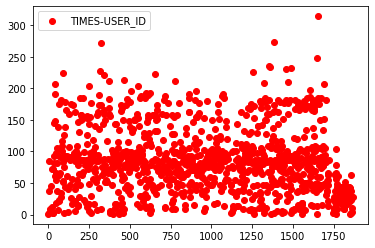

In [19]:
plt.scatter(IDARR,TIMESARR, label='TIMES-USER_ID',color='r')
plt.xlabel='user_ID'
plt.ylabel='times submit'
plt.title='Scatter Plot'
plt.legend()
plt.show()

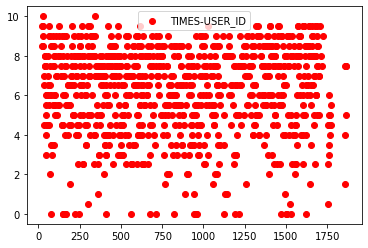

In [21]:
plt.scatter(SCORE['id'],SCORE['CK'], label='TIMES-USER_ID',color='r')
plt.xlabel='user_ID'
plt.ylabel='times submit'
plt.title='Scatter Plot'
plt.legend()
plt.show()

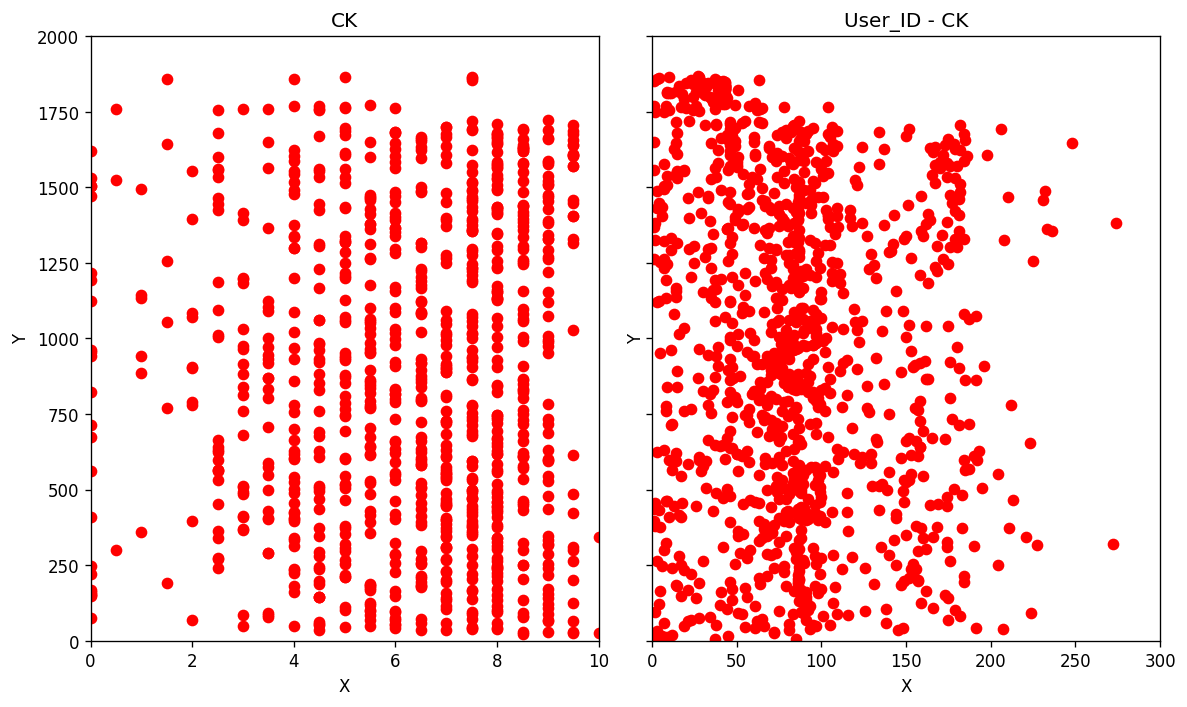

In [26]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(10,6), sharey=True, dpi=120)

ax1.scatter(SCORE['CK'],SCORE['id'], label='TIMES-USER_ID',color='r')
ax3.scatter(TIMESARR,IDARR, label='TIMES-USER_ID',color='r')

ax1.set_title('CK'); 
ax3.set_title('User_ID - CK')

ax1.set_xlabel('X'); ax3.set_xlabel('X')
ax1.set_ylabel('Y'); ax3.set_ylabel('Y') 
ax1.set_xlim(0, 10) ; ax3.set_xlim(0, 300)
ax1.set_ylim(0, 2000); ax3.set_ylim(0, 2000)

plt.tight_layout()
plt.show()